In [ ]:
# İsim: Hilmi Tunahan
# Soyisim BAŞAR
# Okul Numarası: 2112721019
# GitHub Repo Bağlantısı: https://github.com/tunaBasar/ArtificialIntelligence

Gen 0: En İyi Skor = 35.3911 -> (Mat: 1.75 sa, Fen: 9.93 sa)
Gen 5: En İyi Skor = 36.2615 -> (Mat: 2.57 sa, Fen: 9.36 sa)
Gen 10: En İyi Skor = 36.2641 -> (Mat: 2.64 sa, Fen: 9.29 sa)
Gen 15: En İyi Skor = 36.2835 -> (Mat: 2.64 sa, Fen: 9.31 sa)
Gen 20: En İyi Skor = 36.3124 -> (Mat: 2.63 sa, Fen: 9.34 sa)
Gen 25: En İyi Skor = 36.3360 -> (Mat: 2.67 sa, Fen: 9.31 sa)
En İyi Çözüm: Matematik = 2.67 saat, Fen = 9.31 saat
Maksimum Başarı Skoru: 36.3358


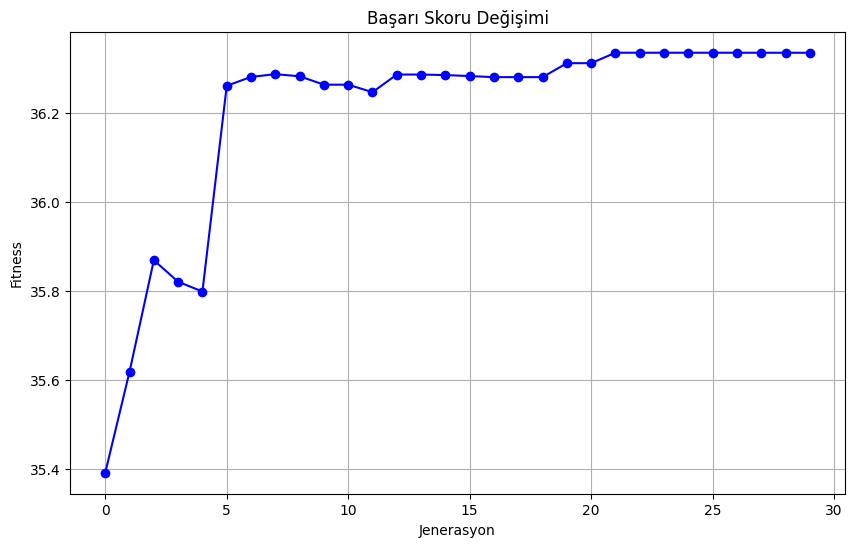

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

POPULATION_SIZE = 50
GENERATIONS = 30
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8

X1_BOUNDS = [0, 10] # Matematik süresi
X2_BOUNDS = [0, 10] # Fen süresi


def objective_function(x1, x2):
    return 4*x1 + 5*x2 - 0.5*(x1**2) - 0.2*(x2**2)

def check_constraints(x1, x2):
    if (x1 + x2 <= 12) and (x2 >= 2):
        return True
    return False

def create_individual():
    while True:
        x1 = random.uniform(X1_BOUNDS[0], X1_BOUNDS[1])
        x2 = random.uniform(X2_BOUNDS[0], X2_BOUNDS[1])
        if check_constraints(x1, x2):
            return [x1, x2]

def create_population(size):
    return [create_individual() for _ in range(size)]

def calculate_fitness(individual):
    x1, x2 = individual[0], individual[1]

    if not check_constraints(x1, x2):
        return -100
    return objective_function(x1, x2)

def selection(population, fitness_scores):
    selected = []
    for _ in range(len(population)):
        candidates_indices = random.sample(range(len(population)), 3)
        candidates = [population[i] for i in candidates_indices]
        candidates_fitness = [fitness_scores[i] for i in candidates_indices]
        winner = candidates[candidates_fitness.index(max(candidates_fitness))]
        selected.append(winner)
    return selected

def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        alpha = random.random()
        child1 = [alpha * parent1[0] + (1-alpha) * parent2[0],
                  alpha * parent1[1] + (1-alpha) * parent2[1]]
        child2 = [(1-alpha) * parent1[0] + alpha * parent2[0],
                  (1-alpha) * parent1[1] + alpha * parent2[1]]

        child1[0] = max(X1_BOUNDS[0], min(child1[0], X1_BOUNDS[1]))
        child1[1] = max(X2_BOUNDS[0], min(child1[1], X2_BOUNDS[1]))
        child2[0] = max(X1_BOUNDS[0], min(child2[0], X1_BOUNDS[1]))
        child2[1] = max(X2_BOUNDS[0], min(child2[1], X2_BOUNDS[1]))

        return child1, child2
    return parent1, parent2

def mutation(individual):
    if random.random() < MUTATION_RATE:
        gene_idx = random.randint(0, 1)
        if gene_idx == 0:
            individual[0] += random.uniform(-1, 1)
            individual[0] = max(X1_BOUNDS[0], min(individual[0], X1_BOUNDS[1]))
        else:
            individual[1] += random.uniform(-1, 1)
            individual[1] = max(X2_BOUNDS[0], min(individual[1], X2_BOUNDS[1]))
    return individual


population = create_population(POPULATION_SIZE)
best_fitness_history = []
best_solution = None

for generation in range(GENERATIONS):
    fitness_scores = [calculate_fitness(ind) for ind in population]

    max_fitness = max(fitness_scores)
    best_fitness_history.append(max_fitness)
    best_ind = population[fitness_scores.index(max_fitness)]

    if generation % 5 == 0:
        print(f"Gen {generation}: En İyi Skor = {max_fitness:.4f} -> (Mat: {best_ind[0]:.2f} sa, Fen: {best_ind[1]:.2f} sa)")

    best_solution = best_ind

    selected_population = selection(population, fitness_scores)

    new_population = []
    for i in range(0, POPULATION_SIZE, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[i+1] if i+1 < POPULATION_SIZE else selected_population[0]

        child1, child2 = crossover(parent1, parent2)


        child1 = mutation(child1)
        if not check_constraints(child1[0], child1[1]): child1 = parent1

        child2 = mutation(child2)
        if not check_constraints(child2[0], child2[1]): child2 = parent2

        new_population.extend([child1, child2])

    population = new_population[:POPULATION_SIZE]

print(f"En İyi Çözüm: Matematik = {best_solution[0]:.2f} saat, Fen = {best_solution[1]:.2f} saat")
print(f"Maksimum Başarı Skoru: {objective_function(best_solution[0], best_solution[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(best_fitness_history, marker='o', linestyle='-', color='b')
plt.title('Başarı Skoru Değişimi')
plt.xlabel('Jenerasyon')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()